google cloud functions


Requirement already up-to-date: kaleido in /usr/local/lib/python3.6/dist-packages (0.1.0)
ERROR: Could not find a version that satisfies the requirement orca==1.2.1 (from versions: 1.0.0, 1.1.0, 1.2.0, 1.3.0, 1.4.0, 1.5.1, 1.5.3, 1.5.4)
ERROR: No matching distribution found for orca==1.2.1
/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
los nodos estan


'hello world'

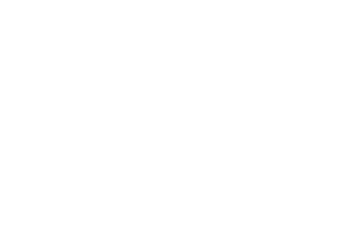

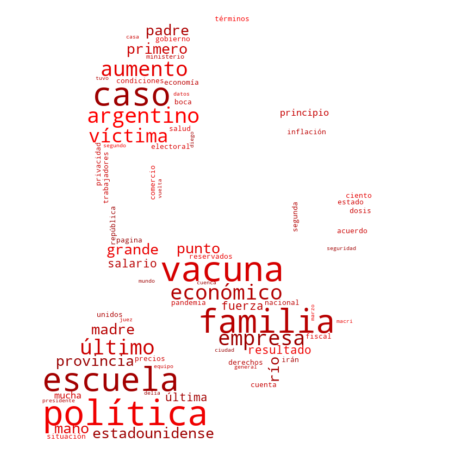

In [ ]:
!pip install TwitterAPI
!pip install -U kaleido
!pip install orca==1.2.1
!pip install plotly==4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
import requests
import json
from operator import itemgetter
from bs4 import BeautifulSoup
import networkx as nx
from TwitterAPI import TwitterAPI
import urllib
from math import pi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import io
from io import BytesIO
import datetime
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random
from plotly.offline import init_notebook_mode, iplot
import plotly.express as ex
import plotly.graph_objs as go
import requests
import json
from operator import itemgetter
from bs4 import BeautifulSoup
import plotly.graph_objects as go
import networkx as nx
from TwitterAPI import TwitterAPI
import urllib
from math import pi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import io
from io import BytesIO
import datetime
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random

outliers = ["ar","Palabras","lunes","martes","miércoles","miercoles","jueves","viernes","sábado","sabado,","domingo","dtype","Frecuencia",'buena', 'cinco', 'tan', 'camino',  'posible', 'local', 'junto' , 'final', 'iba',  'grupo', 'medida',  'explicó', 'dio', 'viernes',  'aún', 'estamos', 'lado', 'nueva', 'agregó', 'respecto', 'ella', 'partir',  'tema', 'zona', 'centro', 'hubo', 'tenemos', 'unos',  'hombre', 'sea', 'llegar', 'dentro', 'información', 'estas',  'veces', 'bajo', 'esos', 'entonces', 'nunca', 'hacia', 'sí', 'quedó', 'hecho', 'misma', 'mil', 'chicos', 'sigue', 'fin', 'decir', 'volver', 'allí', 'nada',  'quienes', 'muchos', 'decisión', 'importante', 'frente', 'estados', 'será', 'relación', 'pasó', 'poder', 'total', 'ir', 'debe', 'pueden',  'sino',  'otras', 'haber', 'través', 'causa', 'mes',  'dice', 'nuevo', 'mejor', 'ver', 'cuerpo', 'estar', 'tenía', 'casi', 'poco', 'primer', 'llegó', 'sólo', 'gente', 'cosas', 'estos', 'mayor', 'primera','algunos', 'mucho', 'forma', 'sido', 'siempre', 'hizo',  'va', 'algo', 'han', 'tienen',  'te', 'aires', 'medio', 'todas', 'él', 'horas', 'tras', 'ellos', 'meses', 'estaba', 'aunque', 'gran', 'antes', 'tener',  'fueron', 'les', 'us', 'menos', 'ante', 'esto', 'otra',  'tanto', 'e', 'pasado', 'solo', 'vida', 'manera', 'semana', 'ni', 'buenos', 'día', 'momento', 'luego', 'tiempo', 'bien', 'otro', 'qué', 'mientras', 'mismo', 'martes', 'otros', 'cómo', 'tres', 'dólares', 'hacer', 'yo', 'contra', 'lunes', 'hace', 'nos', 'están','quien', 'además', 'así', 'lugar', 'uno', 'después', 'durante', 'mi', 'hoy', 'vez', 'año', 'días', 'según', 'país', 'esa', 'cada', 'ahora', 'personas', 'eso', 'puede', 'muy', 'parte', 'dijo', 'era', 'argentina', 'todos', 'ha', 'tiene', 'donde', 'porque', 'ser', 'ese', 'millones', 'todo', 'hasta', 'dos', 'había', 'esta', 'sin', 'son', 'está', 'cuando', 'ya', 'años', 'me', 'hay', 'también', 'entre', 'si', 'sobre', 'sus', 'desde', 'o', 'le', 'este', 'fue', 'pero', 'como', 'más', 'lo', 'su', 'al', 'es', 'no', 'para', 'una', 'con', 'las', 'por', 'un', 'quot', 'se', 'del', 'los', 'a', 'y', 'en', 'que','el','la','de']

def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')
    
def seccionLinks(url):
  linkanterior = ""
  linksadevolver = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  lista = soup.find_all('item')
  indice =0
  while indice<len(lista):
    link = lista[indice].get_text()
    h = 1
    linkver = ""
    while h<len(link):
      if link[h:h+5]== "https":
        linkver=link[0:h]
        h = len(link)       
      h+=1
    if linkver != None:
      if linkver!=linkanterior:
        linkanterior=linkver
        linksadevolver.append(linkver)
    indice+=1
  return linksadevolver

def palabrasArticulo(url):
  palabras = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  #juan = json.loads(soup.find('script',type="application/ld+json").text)
  juan = soup.find_all('p')
  for items in juan:
    if items.get_text() != 'República Argentina | Todos los derechos reservados | Política de privacidad | Términos y Condiciones© 2000-2020 www.pagina12.com.ar':
      palabras+=separaPalabras(items.get_text())
  #palabras+=(separaPalabras(juan["alternativeHeadline"]))
  #palabras+=(separaPalabras(juan["articleBody"]))
  return palabras

def palabrasArticuloBis(url):
  frases = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  juan = soup.find_all('p')
  for items in juan:
    if items.get_text() != 'República Argentina | Todos los derechos reservados | Política de privacidad | Términos y Condiciones© 2000-2020 www.pagina12.com.ar':
      frases+=(separaFrases(items.get_text()))
  return frases

def separaPalabras(frase):
  palabras=[]
  i =0
  while i<len(frase):
    if frase[i].isalpha():
      h=i+1
      while h<len(frase):
        if h==len(frase)-1:
          if frase[h].isalpha():
            if frase[i:h+1].lower() not in outliers:
              palabras.append(frase[i:h+1].lower())
          else :
            if frase[i:h].lower() not in outliers:
              palabras.append(frase[i:h].lower())
          i = len(frase)
        elif frase[h].isalpha()!= True:
          if frase[i:h].lower() not in outliers:
            palabras.append(frase[i:h].lower())
          i = h         
          h = len(frase)
        h+=1
    i+=1
  return palabras

def separaFrases(frase):
  palabras=[]
  i =0
  while i<len(frase):
    h=i+1
    while h<len(frase):
      if h==len(frase)-1:
        palabras.append(frase[i:h])
        i = len(frase)
      elif frase[h]== ".":
        palabras.append(frase[i:h])
        i = h       
        h = len(frase)
      h+=1
    i+=1
  return palabras

def relacionaPalabras(frase,relacionadorDePalabras):
  i = 0
  while i < len(frase)-1:
    h = i+1
    while h < len(frase):
      if frase[i] in relacionadorDePalabras and frase[h] in relacionadorDePalabras[frase[i]]:
        relacionadorDePalabras[frase[i]][frase[h]] +=1
        relacionadorDePalabras[frase[h]][frase[i]] +=1
      else:
        if frase[i] in relacionadorDePalabras:
          relacionadorDePalabras[frase[i]][frase[h]] = 1
          if frase[h] in relacionadorDePalabras:
            relacionadorDePalabras[frase[h]][frase[i]] = 1
          else:
            relacionadorDePalabras[frase[h]] = {}
            relacionadorDePalabras[frase[h]][frase[i]] = 1
        else:
          relacionadorDePalabras[frase[i]] = {}
          relacionadorDePalabras[frase[i]][frase[h]] = 1
          if frase[h] in relacionadorDePalabras:
            relacionadorDePalabras[frase[h]][frase[i]] = 1
          else:
            relacionadorDePalabras[frase[h]] = {}
            relacionadorDePalabras[frase[h]][frase[i]] = 1
      h+=1
    i+=1

def palabrasMaspalabrasMenos(palabras):
  tuplaPalabras = []
  i = 0
  while i<len(palabras):
    palabreta = palabras[i]
    loEncontro = False
    h = 0
    while h<len(tuplaPalabras):
      if palabreta==tuplaPalabras[h][0]:
        loEncontro = True
        nuevatupla = (tuplaPalabras[h][0],tuplaPalabras[h][1]+1)
        tuplaPalabras[h]= nuevatupla
        h = len(tuplaPalabras)
      h+=1
    if loEncontro == False:
      tupla = (palabreta,1)
      tuplaPalabras.append(tupla)
    i+=1
  return sorted(tuplaPalabras, key=itemgetter(1))

def color_func_clarin(word, font_size, position, orientation, random_state=None,**kwargs):
  return "hsl(360, 100%%, %d%%)" % random.randint(30,50)

def hello_world(request):
  outliers = ["Palabras","lunes","martes","miércoles","miercoles","jueves","viernes","sábado","sabado,","domingo","dtype","Frecuencia",'buena', 'cinco', 'tan', 'camino',  'posible', 'local', 'junto' , 'final', 'iba',  'grupo', 'medida',  'explicó', 'dio', 'viernes',  'aún', 'estamos', 'lado', 'nueva', 'agregó', 'respecto', 'ella', 'partir',  'tema', 'zona', 'centro', 'hubo', 'tenemos', 'unos',  'hombre', 'sea', 'llegar', 'dentro', 'información', 'estas',  'veces', 'bajo', 'esos', 'entonces', 'nunca', 'hacia', 'sí', 'quedó', 'hecho', 'misma', 'mil', 'chicos', 'sigue', 'fin', 'decir', 'volver', 'allí', 'nada',  'quienes', 'muchos', 'decisión', 'importante', 'frente', 'estados', 'será', 'relación', 'pasó', 'poder', 'total', 'ir', 'debe', 'pueden',  'sino',  'otras', 'haber', 'través', 'causa', 'mes',  'dice', 'nuevo', 'mejor', 'ver', 'cuerpo', 'estar', 'tenía', 'casi', 'poco', 'primer', 'llegó', 'sólo', 'gente', 'cosas', 'estos', 'mayor', 'primera','algunos', 'mucho', 'forma', 'sido', 'siempre', 'hizo',  'va', 'algo', 'han', 'tienen',  'te', 'aires', 'medio', 'todas', 'él', 'horas', 'tras', 'ellos', 'meses', 'estaba', 'aunque', 'gran', 'antes', 'tener',  'fueron', 'les', 'us', 'menos', 'ante', 'esto', 'otra',  'tanto', 'e', 'pasado', 'solo', 'vida', 'manera', 'semana', 'ni', 'buenos', 'día', 'momento', 'luego', 'tiempo', 'bien', 'otro', 'qué', 'mientras', 'mismo', 'martes', 'otros', 'cómo', 'tres', 'dólares', 'hacer', 'yo', 'contra', 'lunes', 'hace', 'nos', 'están','quien', 'además', 'así', 'lugar', 'uno', 'después', 'durante', 'mi', 'hoy', 'vez', 'año', 'días', 'según', 'país', 'esa', 'cada', 'ahora', 'personas', 'eso', 'puede', 'muy', 'parte', 'dijo', 'era', 'argentina', 'todos', 'ha', 'tiene', 'donde', 'porque', 'ser', 'ese', 'millones', 'todo', 'hasta', 'dos', 'había', 'esta', 'sin', 'son', 'está', 'cuando', 'ya', 'años', 'me', 'hay', 'también', 'entre', 'si', 'sobre', 'sus', 'desde', 'o', 'le', 'este', 'fue', 'pero', 'como', 'más', 'lo', 'su', 'al', 'es', 'no', 'para', 'una', 'con', 'las', 'por', 'un', 'quot', 'se', 'del', 'los', 'a', 'y', 'en', 'que','el','la','de']

  x = datetime.datetime.now()
  fechaHoy = str(x.day)+"/"+str(x.month)+"/"+str(x.year)
  secciones = {"el-pais":[],"economia":[],"sociedad":[],"deportes":[],"cultura-y-espectaculos":[],"el-mundo":[]}
  total = []
  relacionador = {}
  listadeerrores = ""
  for keys in secciones:
    articulos = seccionLinks("https://www.pagina12.com.ar/rss/secciones/"+keys+"/notas")
    for articulo in articulos:
      #try:
      frases = palabrasArticuloBis(articulo)
      for frase in frases:
        relacionaPalabras(separaPalabras(frase),relacionador)
      secciones[keys] += palabrasArticulo(articulo)   
      total += palabrasArticulo(articulo)
      #except Exception as e:
      #listadeerrores+= str(e)
  for keys in secciones:
    secciones[keys] = palabrasMaspalabrasMenos(secciones[keys])
  total = palabrasMaspalabrasMenos(total)

  consumer_key = "7SnulbvNSSsRCoExpLOcFzuEk"
  consumer_secret = "GOl0GlxQOTTm2z6DGgOdhRNQGEPkzjLXEeFcoTKLFxeOGmimNx"
  access_token = "1325109247735107585-4I2ciupiOOoLWvDVfnqhTUtxWG2VRP"
  access_token_secret = "HoogPc1hM0PDSfrfo9U9y9sJqVQCGwGlbgVvbjNXIsflO"

  CONSUMER_KEY = consumer_key
  CONSUMER_SECRET = consumer_secret
  ACCESS_TOKEN_KEY = access_token
  ACCESS_TOKEN_SECRET = access_token_secret

  api = TwitterAPI(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)


  registrador = {}
  eliminar = []
  miNet = nx.Graph()
  listadeGrandes = []
  diccionarioTamNodos = {}

  for palabra in relacionador:
    tamNodo = 0
    for keys in secciones:
      for tuplas in secciones[keys]:
        if tuplas[0] == palabra:
          tamNodo+= tuplas[1]
    diccionarioTamNodos[palabra] = tamNodo
    if len(listadeGrandes)<16:
        listadeGrandes.append(palabra)
    else:
      menor = palabra
      posicion = 100
      for palabre in listadeGrandes:
        if diccionarioTamNodos[palabre]<diccionarioTamNodos[menor]:
          menor = palabre
          posicion = listadeGrandes.index(palabre)
      if menor != palabra:
        listadeGrandes[posicion]=palabra
  
  
  for palabras in listadeGrandes:
    miNet.add_node(palabras,size = diccionarioTamNodos[palabras]/20)

  indice = 0
  while indice < len(listadeGrandes)-1:
    indice2 = indice+1
    while indice2 < len(listadeGrandes):
      tamTrace = 0
      if listadeGrandes[indice2] in relacionador[listadeGrandes[indice]]:
        if relacionador[listadeGrandes[indice]][listadeGrandes[indice2]]> min(diccionarioTamNodos[listadeGrandes[indice]]/20,diccionarioTamNodos[listadeGrandes[indice2]]/20):
          tamTrace = min(diccionarioTamNodos[listadeGrandes[indice]]/20,diccionarioTamNodos[listadeGrandes[indice2]]/20)
        else:
          tamTrace = relacionador[listadeGrandes[indice]][listadeGrandes[indice2]]
        miNet.add_edge(listadeGrandes[indice], listadeGrandes[indice2], weight = (tamTrace))
      indice2+=1
    indice+=1

  pos_ = nx.spring_layout(miNet)

  edge_trace = []
  for edge in miNet.edges():
    char_1 = edge[0]
    char_2 = edge[1]
    x0, y0 = pos_[char_1]
    x1, y1 = pos_[char_2]
    text   = char_1 + '--' + char_2 + ': ' + str(miNet.edges()[edge]['weight'])
    trace  = make_edge([x0, x1, None], [y0, y1, None], text, width = 0.3*miNet.edges()[edge]['weight']**1.75)
    edge_trace.append(trace)

  # Make a node trace
  node_trace = go.Scatter(x         = [],
                          y         = [],
                          text      = [],
                          textposition = "top center",
                          textfont_size = 10,
                          mode      = 'markers+text',
                          hoverinfo = 'none',
                          marker    = dict(color = [],
                                          size  = [],
                                          line  = None))

   # For each node in midsummer, get the position and size and add to the node_trace
  for node in miNet.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([5*miNet.nodes()[node]['size']])
    node_trace['text'] += tuple(['<b>' + node + '</b>'])

  # Customize layout
  layout = go.Layout(
      #paper_bgcolor='rgba(0,0,0,0)',
      #plot_bgcolor='rgba(0,0,0,0)', 
      xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
      yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
  )# Create figure
  fig = go.Figure(layout = layout)# Add all edge traces
  print("los nodos estan")
  for r in edge_trace:
    fig.add_trace(r)

      # Add node trace
  fig.add_trace(node_trace)# Remove legend
  fig.update_layout(showlegend = False)# Remove tick labels
  fig.update_xaxes(showticklabels = False)
  fig.update_yaxes(showticklabels = False)

  img_bytes = fig.to_image(format="png")
  data = img_bytes
  statustw = 'Relacion de Palabras del dia Pagina12'
  r = api.request('statuses/update_with_media', {'status': statustw}, {'media[]':data})   

  url = "https://i.ibb.co/rtq6Hkk/peron-final-retocada.jpg"
  response = requests.get(url)
  clarin_mask = Image.open(BytesIO(response.content))
  stopwords = set(STOPWORDS)
  for word in outliers:
    stopwords.add(word)
  text = ""
  k=  len(total)-1
  while k>0 and k>(len(total)-495):
    tupla= total[k]
    stringaux = " "+ tupla[0]        
    text+= stringaux
    k-=1
  clarin_mask = np.asanyarray(clarin_mask)


  
  try:
    wc_clarin = WordCloud(min_font_size = 10, background_color="white",color_func= color_func_clarin, max_words=500,mask= clarin_mask,
            stopwords=stopwords, contour_width=1, contour_color='white')
    wc_clarin.generate(text)
    
  except Exception as e:
    return listadeerrores
    
    

  plt.axis("off")
    # Ajustar el tamaño acá, en el figsize.
  plt.figure(figsize = (15,8))
  plt.imshow(wc_clarin, cmap=plt.cm.gray, interpolation='bilinear')
  plt.axis("off")
  figfile = BytesIO()
  plt.savefig(figfile, format='png')
  data = figfile
  figfile.seek(0)  # rewind the data
  statustw = 'WordCloud Pag12 del dia' 
  r = api.request('statuses/update_with_media', {'status': statustw}, {'media[]':data})   
  return "hello world"

hello_world(0)




### Por lo pronto, analizar y contrastar diarios, visualizando palabras claves y resultados

## Lo hacemos sopa, bro

In [ ]:
#!pip install bs4
from bs4 import BeautifulSoup

In [ ]:
outliers = ["Palabras","lunes","martes","miércoles","miercoles","jueves","viernes","sábado","sabado,","domingo","dtype","Frecuencia",'buena', 'cinco', 'tan', 'camino',  'posible', 'local', 'junto' , 'final', 'iba',  'grupo', 'medida',  'explicó', 'dio', 'viernes',  'aún', 'estamos', 'lado', 'nueva', 'agregó', 'respecto', 'ella', 'partir',  'tema', 'zona', 'centro', 'hubo', 'tenemos', 'unos',  'hombre', 'sea', 'llegar', 'dentro', 'información', 'estas',  'veces', 'bajo', 'esos', 'entonces', 'nunca', 'hacia', 'sí', 'quedó', 'hecho', 'misma', 'mil', 'chicos', 'sigue', 'fin', 'decir', 'volver', 'allí', 'nada',  'quienes', 'muchos', 'decisión', 'importante', 'frente', 'estados', 'será', 'relación', 'pasó', 'poder', 'total', 'ir', 'debe', 'pueden',  'sino',  'otras', 'haber', 'través', 'causa', 'mes',  'dice', 'nuevo', 'mejor', 'ver', 'cuerpo', 'estar', 'tenía', 'casi', 'poco', 'primer', 'llegó', 'sólo', 'gente', 'cosas', 'estos', 'mayor', 'primera','algunos', 'mucho', 'forma', 'sido', 'siempre', 'hizo',  'va', 'algo', 'han', 'tienen',  'te', 'aires', 'medio', 'todas', 'él', 'horas', 'tras', 'ellos', 'meses', 'estaba', 'aunque', 'gran', 'antes', 'tener',  'fueron', 'les', 'us', 'menos', 'ante', 'esto', 'otra',  'tanto', 'e', 'pasado', 'solo', 'vida', 'manera', 'semana', 'ni', 'buenos', 'día', 'momento', 'luego', 'tiempo', 'bien', 'otro', 'qué', 'mientras', 'mismo', 'martes', 'otros', 'cómo', 'tres', 'dólares', 'hacer', 'yo', 'contra', 'lunes', 'hace', 'nos', 'están','quien', 'además', 'así', 'lugar', 'uno', 'después', 'durante', 'mi', 'hoy', 'vez', 'año', 'días', 'según', 'país', 'esa', 'cada', 'ahora', 'personas', 'eso', 'puede', 'muy', 'parte', 'dijo', 'era', 'argentina', 'todos', 'ha', 'tiene', 'donde', 'porque', 'ser', 'ese', 'millones', 'todo', 'hasta', 'dos', 'había', 'esta', 'sin', 'son', 'está', 'cuando', 'ya', 'años', 'me', 'hay', 'también', 'entre', 'si', 'sobre', 'sus', 'desde', 'o', 'le', 'este', 'fue', 'pero', 'como', 'más', 'lo', 'su', 'al', 'es', 'no', 'para', 'una', 'con', 'las', 'por', 'un', 'quot', 'se', 'del', 'los', 'a', 'y', 'en', 'que','el','la','de']

Entra a una seccion y devuelve los links de los articulos de esa seccion

In [ ]:
def seccionLinks(url):
  linkanterior = ""
  linksadevolver = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  lista = soup.find_all('item')
  indice =0
  while indice<len(lista):
    link = lista[indice].get_text()
    h = 1
    linkver = ""
    while h<len(link):
      if link[h:h+5]== "https":
        linkver=link[0:h]
        h = len(link)       
      h+=1
    if linkver != None:
      if linkver!=linkanterior:
        linkanterior=linkver
        linksadevolver.append(linkver)
    indice+=1
  return linksadevolver


Devuelve las palabras de un articulo

In [ ]:
def palabrasArticulo(url):
  palabras = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  #juan = json.loads(soup.find('script',type="application/ld+json").text)
  juan = soup.find_all('p')
  for items in juan:
    if items.get_text() != 'República Argentina | Todos los derechos reservados | Política de privacidad | Términos y Condiciones© 2000-2020 www.pagina12.com.ar':
      palabras+=separaPalabras(items.get_text())
  #palabras+=(separaPalabras(juan["alternativeHeadline"]))
  #palabras+=(separaPalabras(juan["articleBody"]))
  return palabras

Separa las frases en palabras

In [ ]:
def separaPalabras(frase):
  palabras=[]
  i =0
  while i<len(frase):
    if frase[i].isalpha():
      h=i+1
      while h<len(frase):
        if h==len(frase)-1:
          if frase[h].isalpha():
            if frase[i:h+1].lower() not in outliers:
              palabras.append(frase[i:h+1].lower())
          else :
            if frase[i:h].lower() not in outliers:
              palabras.append(frase[i:h].lower())
          i = len(frase)
        elif frase[h].isalpha()!= True:
          if frase[i:h].lower() not in outliers:
            palabras.append(frase[i:h].lower())
          i = h         
          h = len(frase)
        h+=1
    i+=1
  return palabras


Retorna cuantas veces aparece cada palabra 

In [ ]:
def palabrasMaspalabrasMenos(palabras):
  tuplaPalabras = []
  i = 0
  while i<len(palabras):
    palabreta = palabras[i]
    loEncontro = False
    h = 0
    while h<len(tuplaPalabras):
      if palabreta==tuplaPalabras[h][0]:
        loEncontro = True
        nuevatupla = (tuplaPalabras[h][0],tuplaPalabras[h][1]+1)
        tuplaPalabras[h]= nuevatupla
        h = len(tuplaPalabras)
      h+=1
    if loEncontro == False:
      tupla = (palabreta,1)
      tuplaPalabras.append(tupla)
    i+=1
  return sorted(tuplaPalabras, key=itemgetter(1))

In [ ]:
secciones = {"el-pais":[],"economia":[],"sociedad":[],"deportes":[],"cultura-y-espectaculos":[],"el-mundo":[]}

Usa las funciones definidas anteriormente para analizar la pagina de clarin y agregarle a cada seccion una lista de palabras y la cant de veces que aparece

In [ ]:
#tarda unos 5 mins en correr porque agarra todo pagina12
for keys in secciones:
  articulos = seccionLinks("https://www.pagina12.com.ar/rss/secciones/"+keys+"/notas")
  for articulo in articulos:
    try:
      secciones[keys] += palabrasArticulo(articulo)   
    except:
      print(len(articulo))
for keys in secciones:
  secciones[keys] = palabrasMaspalabrasMenos(secciones[keys])

Cosas para Sankey:

In [ ]:
sources = []
targets = []
values = []
labels = []
labels.append("Pagina12")
for keys in secciones:
  labels.append(keys)
  sources.append(0)
  targets.append(len(labels)-1)
  cantPalabras = 0
  #print(str(len(secciones[keys])))
  for palabras in secciones[keys]:
    cantPalabras+= palabras[1]
  values.append(cantPalabras)
j=1
for keys in secciones: 
  if len(secciones[keys])>=10:
    i = 0
    while i<5:
      sources.append(j)
      joan = secciones[keys] 
      rudo = joan[len(secciones[keys])-1-i]
      labels.append(rudo[0])
      targets.append(len(labels)-1)
      values.append(rudo[1])
      i+=1
  else:
    print(keys)
  j+=1

cultura-y-espectaculos


In [ ]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity

data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                              for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  labels,
      color =  data['data'][0]['node']['color']
    ),
    # Add links

    link = dict(
      source = sources,
      target =  targets,
      value =  values,
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Palabras más utilizadas por sección en Clarín",
                  font_size=10)
fig.show()

### PRO


In [ ]:
import re
#patron_re = ([^\W_]+[^\s,]*)
#patron = re.compile(patron_re)

articulos_a = pd.DataFrame(articulos, columns=["Articulos"])
articulos_a = articulos_a.astype(str)
#articulos_a.set_index().A.str.split('/', expand=True).stack().reset_index()
articulos_a.Articulos = articulos_a.Articulos.replace(to_replace ='/', value = ' ', regex = True) 
articulos_a.Articulos = articulos_a.Articulos.replace(to_replace ='-', value = ' ', regex = True) 
articulos_a = articulos_a.Articulos.str.split((" "), expand = True) 
#articulos_a = articulos_a.Articulos.str.split(("-"), expand = True)  
#articulos_a_split = articulos_a.Articulos.str.split(("(\w+)"), expand= True)
#articulos_a_split


articulos_a = articulos_a.replace('\d+', '')
articulos_a

#articulos_sin_categoria = articulos_a.iloc[:,2:].astype(str)
#articulos_sin_categoria
#articulos_sin_categoría.apply(lambda x: re.search(r'^[^_]*', x).group(1))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,https:,,www.pagina12.com.ar,294502,ex,presos,politicos,uruguayos,exigen,un,tribunal,de,honor,pa,None,None,None,None
1,https:,,www.pagina12.com.ar,294496,netanyahu,lavaria,los,trapos,sucios,fuera,de,su,casa,None,None,None,None,None
2,https:,,www.pagina12.com.ar,294495,andres,arauz,el,candidato,del,correismo,a,la,presidencia,den,None,None,None,None
3,https:,,www.pagina12.com.ar,294480,la,justicia,de,ecuador,ordeno,la,captura,del,expresidente,ra,None,None,None,None
4,https:,,www.pagina12.com.ar,294472,abuchearon,a,donald,trump,en,la,despedida,a,la,jueza,ginsbur,None,None,None
5,https:,,www.pagina12.com.ar,294456,cambio,climatico,otra,pelea,entre,ricos,y,pobres,None,None,None,None,None,None
6,https:,,www.pagina12.com.ar,294380,ponen,a,la,venta,por,20,millones,de,dolares,a,la,isla,guafo,
7,https:,,www.pagina12.com.ar,294375,una,aerolinea,ofrece,tests,rapidos,de,coronavirus,a,sus,pasa,None,None,None,None
8,https:,,www.pagina12.com.ar,294354,trump,se,nego,a,asegurar,que,entregara,el,poder,si,pierde,la,None,None
9,https:,,www.pagina12.com.ar,294348,como,trump,putin,tambien,es,candidato,al,nobel,de,la,paz,None,None,None


In [ ]:
#import re

#def split_it(palabra):
#    return re.findall('/\b($wpalabra)\b/i', palabra)
#articulos_a['Articulo separado'] = articulos_a.Articulos.apply(lambda x: split_it(x))
#articulos_a



In [ ]:
secciones = [[secciones["politica"],secciones["economia"], secciones["deportes"], secciones["rural"], secciones["mundo"]]

#s_politica = secciones["politica"]


#def trabajamos_secciones(secciones):
#  secciones = 
#  total_seccion = 

a,b = map(list,zip(*s_politica))
b = [int(i) for i in b] 

def suma_de_lista(b):
  total = 0
  for val in b:
    total = total + val
  return total



SyntaxError: ignored

In [ ]:
import plotly.graph_objects as go
import networkx as nx
from operator import itemgetter
from networkx.algorithms import community

uw = pd.DataFrame(secciones[keys])
uw.columns = ['Palabras', 'Veces que aparece']
# G=nx.from_pandas_dataframe(uw, 0, 'b', ['weight', 'cost'])


In [ ]:
nxG = nx.Graph()

In [ ]:
G = nx.from_pandas_edgelist(uw, 'Palabras', 'Veces que aparece')

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

## Probamos WordClouds

In [ ]:
# Librerías
#!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### Wordcloud grande

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text_wordcloud = df.tail(30)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text_wordcloud))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Wordcloud chico

In [ ]:
wordcloud = WordCloud().generate(str(text_wordcloud))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud Clarín (en proceso) La idea es agarrar el logo de Clarín y su fuente y armar un wordcloud (fuente: Portada)

In [ ]:
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    

In [ ]:
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import urllib
import requests
import matplotlib.pyplot as plt

In [ ]:
text = df.Palabras
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [ ]:
mask = np.array(Image.open(requests.get("https://imagizer.imageshack.com/img922/8283/jSbKW4.png", stream=True).raw))
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(str(text))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()